In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import pytse_client as tse
import tensorflow as tf
import seaborn as sns
from timeit import default_timer as timer
from keras.layers import LSTM, Dense, Dropout,Convolution1D, Activation, MaxPooling1D, Flatten,Input
from keras.models import Model, Sequential, load_model
from matplotlib.pylab import rcParams
from keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
import math
from tensorflow.keras import layers
from keras.callbacks import TensorBoard
from time import time
from tqdm.keras import TqdmCallback
#rcParams["figure.figsize"] = (20, 10)

In [2]:
Ind1 = pd.read_csv('tickers_data/فولاد2.csv')
Ind1.head()
display(Ind1)

,date,open,high,low,adjClose,Profitability of the company,Number of Trade,count,close,p/e
0,2009-01-03,1929.0,1971.0,1920.0,1943.0,7048410617,3585874,264,1971.0,6.06
1,2009-01-04,1997.0,2001.0,1989.0,1953.0,2298669391,1149500,152,1999.0,6.06
2,2009-01-05,2011.0,2011.0,2000.0,1960.0,1708573559,850604,107,2000.0,6.06
3,2009-01-10,2010.0,2018.0,1954.0,1966.0,7627872422,3871454,129,1954.0,6.06
4,2009-01-11,1942.0,1966.0,1908.0,1959.0,3027983197,1561626,110,1921.0,6.06
...,...,...,...,...,...,...,...,...,...,...
2229,2019-02-23,3168.0,3198.0,3148.0,3196.0,644157163454,201549362,9623,3198.0,6.71
2230,2019-02-24,3251.0,3275.0,3180.0,3245.0,289517810591,89210761,6024,3229.0,6.71
2231,2019-02-25,3251.0,3379.0,3251.0,3322.0,217810875759,65568770,4916,3337.0,6.71
2232,2019-02-26,3270.0,3330.0,3230.0,3275.0,138035632422,42152442,3221,3257.0,6.71


In [3]:
#astype date in first code
S=Ind1.iloc[:, 0:1]
S1=pd.DataFrame(S)
display(S1.dtypes)
S1['date'] = S1['date'].astype('datetime64[ns]')
S1

date    object
dtype: object

,date
0,2009-01-03
1,2009-01-04
2,2009-01-05
3,2009-01-10
4,2009-01-11
...,...
2229,2019-02-23
2230,2019-02-24
2231,2019-02-25
2232,2019-02-26


In [ ]:
#first code
to_drop=['date','high','low','Profitability of the company','Number of Trade','adjClose','count','close','p/e']
Ind1.drop(to_drop,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise open data
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
# join datas
joinInd=S1.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#save data
joinInd.to_csv('data/final_Indopen.csv')

In [4]:
#second code
Ind2 = pd.read_csv('tickers_data/final_Indopen.csv')
Ind2.head()

,Unnamed: 0,date,open
0,0,2009-01-03,0.165009
1,1,2009-01-04,0.177087
2,2,2009-01-05,0.179574
3,3,2009-01-10,0.179396
4,4,2009-01-11,0.167318


In [ ]:
to_drop1=['date','open','low','Profitability of the company','Number of Trade','adjClose','count','close','p/e']
Ind1.drop(to_drop1,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise high
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
#join data
joinInd=Ind2.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#Drop number
to_drop1=['Unnamed: 0']
joinInd.drop(to_drop1,inplace=True, axis=1)
joinInd.head()
joinInd.tail()
display(joinInd)
#save data
joinInd.to_csv('data/final_Indhigh.csv')

In [ ]:
#third code
Ind2 = pd.read_csv('tickers_data/final_Indhigh.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'Profitability of the company', 'Number of Trade', 'adjClose','count','close','p/e']
Ind1.drop(to_drop1,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise high
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
#join data
joinInd=Ind2.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#Drop number
to_drop1=['Unnamed: 0']
joinInd.drop(to_drop1,inplace=True, axis=1)
joinInd.head()
joinInd.tail()
display(joinInd)
#save data
joinInd.to_csv('data/final_Indlow.csv')

In [ ]:
#forth code
Ind2 = pd.read_csv('tickers_data/final_Indlow.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Number of Trade','adjClose','count','close','p/e']
Ind1.drop(to_drop1,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise high
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
#join data
joinInd=Ind2.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#Drop number
to_drop1=['Unnamed: 0']
joinInd.drop(to_drop1,inplace=True, axis=1)
joinInd.head()
joinInd.tail()
display(joinInd)
#save data
joinInd.to_csv('data/final_IndProfitability of the company.csv')

In [ ]:
#fifth code
Ind2 = pd.read_csv('tickers_data/final_IndProfitability of the company.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','close','p/e']
Ind1.drop(to_drop1,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise high
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
#join data
joinInd=Ind2.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#Drop number
to_drop1=['Unnamed: 0']
joinInd.drop(to_drop1,inplace=True, axis=1)
joinInd.head()
joinInd.tail()
display(joinInd)
#save data
joinInd.to_csv('data/final_IndNumber of Trade.csv')

In [ ]:
#sixth code
Ind2 = pd.read_csv('tickers_data/final_IndNumber of Trade.csv')
Ind2.head()

In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','Number of Trade','p/e']
Ind1.drop(to_drop1,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise high
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
#join data
joinInd=Ind2.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#Drop number
to_drop1=['Unnamed: 0']
joinInd.drop(to_drop1,inplace=True, axis=1)
joinInd.head()
joinInd.tail()
display(joinInd)
#save data
joinInd.to_csv('data/final_IndClose.csv')

In [5]:
#seventh code
Ind2 = pd.read_csv('tickers_data/final_IndClose.csv')
Ind2.head()

,Unnamed: 0,date,open,high,low,Profitability of the company,Number of Trade,close
0,0,2009-01-03,0.165009,0.171439,0.175655,0.002544,0.005524,0.179815
1,1,2009-01-04,0.177087,0.176774,0.188758,0.000826,0.001765,0.185000
2,2,2009-01-05,0.179574,0.178552,0.190847,0.000613,0.001303,0.185185
3,3,2009-01-10,0.179396,0.179797,0.182112,0.002753,0.005965,0.176667
4,4,2009-01-11,0.167318,0.170550,0.173376,0.001090,0.002401,0.170556


In [ ]:
to_drop1=['date','open', 'high', 'low','Profitability of the company','adjClose','count','Number of Trade','close']
Ind1.drop(to_drop1,inplace=True, axis=1)
Ind1.head()
Ind1.tail()
display(Ind1)
#Normalise high
Ind1_Norm = (Ind1 - Ind1.min())/(Ind1.max() - Ind1.min())
print(Ind1_Norm.head(2264))
print(Ind1_Norm.min())
print(Ind1_Norm.max())
#join data
joinInd=Ind2.join(Ind1_Norm, lsuffix="_left", rsuffix="_right")
joinInd
#Drop number
to_drop1=['Unnamed: 0']
joinInd.drop(to_drop1,inplace=True, axis=1)
joinInd.head()
joinInd.tail()
display(joinInd)
#save data
joinInd.to_csv('data/final_IndPE.csv')

In [3]:
# load train data in third code
Ind1_train=pd.read_csv('tickers_data/فولاد2_train.csv')
Ind1_train.shape
#Ind1_train.head(1562)

(1562, 9)

In [6]:
to_drop1=['number']
Ind1_train.drop(to_drop1,inplace=True, axis=1)
#Ind1_train.head()

In [7]:
#choose train data in third code
training_set = Ind1_train.iloc[:, 2:3].values

In [8]:
#normalization data in third code
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
#split x, y train in third code
X_train = []
y_train = []
for i in range(21, 1260):
    X_train.append(training_set_scaled[i-21:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
#reshape x train in third code
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
display(training_set_scaled)
training_set_scaled.max()
#training_set_scaled.min()

array([[0.21455598],
       [0.22123303],
       [0.22345871],
       ...,
       [0.09414645],
       [0.09637213],
       [0.09325618]])

1.0

In [12]:
#read test data third
Ind1_test=pd.read_csv('tickers_data/فولاد2_test.csv')
Ind1_test.shape

(672, 10)

In [13]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(y_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
#model.summary()

Epoch 1/10
31/31 [==============================] - 33s 289ms/step - loss: 0.0988 - mse: 0.0988 - mae: 0.2517 - mape: 61.6039 - val_loss: 0.0430 - val_mse: 0.0430 - val_mae: 0.1868 - val_mape: 26.4022
Epoch 2/10
31/31 [==============================] - 4s 129ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1192 - mape: 29.3253 - val_loss: 0.0103 - val_mse: 0.0103 - val_mae: 0.0728 - val_mape: 13.6459
Epoch 3/10
31/31 [==============================] - 4s 119ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1035 - mape: 24.8898 - val_loss: 0.0081 - val_mse: 0.0081 - val_mae: 0.0628 - val_mape: 10.8724
Epoch 4/10
31/31 [==============================] - 4s 118ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0866 - mape: 21.2426 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0614 - val_mape: 10.7673
Epoch 5/10
31/31 [==============================] - 4s 120ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0857 - mape: 21.5601 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0671 - val_mape: 11.3671

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [14]:
#model with 6 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 36s 396ms/step - loss: 0.0822 - mse: 0.0822 - mae: 0.2219 - mape: 54.7102 - val_loss: 0.0086 - val_mse: 0.0086 - val_mae: 0.0668 - val_mape: 11.9148
Epoch 2/10
31/31 [==============================] - 5s 162ms/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1097 - mape: 27.1354 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0941 - val_mape: 14.5191
Epoch 3/10
31/31 [==============================] - 5s 166ms/step - loss: 0.0165 - mse: 0.0165 - mae: 0.0953 - mape: 23.2150 - val_loss: 0.0077 - val_mse: 0.0077 - val_mae: 0.0611 - val_mape: 10.8335
Epoch 4/10
31/31 [==============================] - 5s 169ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0885 - mape: 21.4457 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0611 - val_mape: 10.9461
Epoch 5/10
31/31 [==============================] - 4s 130ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0863 - mape: 21.1006 - val_loss: 0.0083 - val_mse: 0.0083 - val_mae: 0.0656 - val_mape: 10.9908

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [12]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 25s 291ms/step - loss: 0.1040 - mse: 0.1040 - mae: 0.2479 - mape: 59.2218 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.1089 - val_mape: 20.1200
Epoch 2/10
31/31 [==============================] - 3s 101ms/step - loss: 0.0217 - mse: 0.0217 - mae: 0.1109 - mape: 27.1973 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0687 - val_mape: 12.9106
Epoch 3/10
31/31 [==============================] - 3s 103ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0942 - mape: 23.4860 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0743 - val_mape: 12.3198
Epoch 4/10
31/31 [==============================] - 3s 100ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0913 - mape: 23.1314 - val_loss: 0.0087 - val_mse: 0.0087 - val_mae: 0.0644 - val_mape: 11.7867
Epoch 5/10
31/31 [==============================] - 3s 102ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0875 - mape: 21.8711 - val_loss: 0.0083 - val_mse: 0.0083 - val_mae: 0.0631 - val_mape: 11.1981

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 7 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))

model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 20
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [15]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 38s 361ms/step - loss: 0.1012 - mse: 0.1012 - mae: 0.2535 - mape: 62.9164 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0722 - val_mape: 12.1692
Epoch 2/10
31/31 [==============================] - 4s 126ms/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1089 - mape: 26.3777 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0892 - val_mape: 14.4927
Epoch 3/10
31/31 [==============================] - 4s 143ms/step - loss: 0.0205 - mse: 0.0205 - mae: 0.1056 - mape: 25.1509 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0775 - val_mape: 14.1417
Epoch 4/10
31/31 [==============================] - 4s 134ms/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0923 - mape: 22.7639 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0671 - val_mape: 12.4013
Epoch 5/10
31/31 [==============================] - 4s 137ms/step - loss: 0.0151 - mse: 0.0151 - mae: 0.0900 - mape: 22.3133 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0692 - val_mape: 12.5253

In [17]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 29s 259ms/step - loss: 0.1001 - mse: 0.1001 - mae: 0.2510 - mape: 62.3528 - val_loss: 0.0115 - val_mse: 0.0115 - val_mae: 0.0802 - val_mape: 13.3694
Epoch 2/10
31/31 [==============================] - 4s 120ms/step - loss: 0.0174 - mse: 0.0174 - mae: 0.1015 - mape: 25.4946 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0760 - val_mape: 13.9002
Epoch 3/10
31/31 [==============================] - 4s 130ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0959 - mape: 23.6052 - val_loss: 0.0208 - val_mse: 0.0208 - val_mae: 0.1116 - val_mape: 19.4417
Epoch 4/10
31/31 [==============================] - 4s 125ms/step - loss: 0.0160 - mse: 0.0160 - mae: 0.0935 - mape: 22.3341 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0757 - val_mape: 13.7964
Epoch 5/10
31/31 [==============================] - 4s 120ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0836 - mape: 21.9953 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0947 - val_mape: 17.4962

In [ ]:
#model with 8 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [19]:
#model with 9 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 32s 320ms/step - loss: 0.1063 - mse: 0.1063 - mae: 0.2521 - mape: 61.1350 - val_loss: 0.0151 - val_mse: 0.0151 - val_mae: 0.1033 - val_mape: 16.8601
Epoch 2/10
31/31 [==============================] - 5s 153ms/step - loss: 0.0188 - mse: 0.0188 - mae: 0.1055 - mape: 27.5857 - val_loss: 0.0161 - val_mse: 0.0161 - val_mae: 0.0924 - val_mape: 17.6509
Epoch 3/10
31/31 [==============================] - 5s 155ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.1062 - mape: 26.6825 - val_loss: 0.0099 - val_mse: 0.0099 - val_mae: 0.0715 - val_mape: 13.1668
Epoch 4/10
31/31 [==============================] - 5s 153ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0916 - mape: 22.5995 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.1152 - val_mape: 17.9833
Epoch 5/10
31/31 [==============================] - 5s 151ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0960 - mape: 23.6770 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0706 - val_mape: 12.1317

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 2 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 3 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [ ]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 4 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

In [15]:
#model with 10 layer lstm
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=32, input_shape=(X_train.shape[0], 1)))
model.add(Dropout(0.5)) 
model.add(Dense(units=1)) # Prediction of the next closing value

generations = 10 # The higher the value the better the result
start_timer = timer()
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)
end_timer = timer()
print(f'Time elapsed: {str(end_timer - start_timer)[:5]} sec.')
print('Done training a model!')
#model with 5 layer cnn
model2 = Sequential()
model2.add(Convolution1D(64, 3, input_shape=(X_train.shape[0], 1)))
model2.add(MaxPooling1D(pool_size=1))
#model.add(LSTM(100, return_sequences=True))
#model2.add(Dropout(0.2))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(64, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Convolution1D(32, 3))
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
#model2.add(Dense(1))
#model.add(Activation('linear'))
generations = 10
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse','mae','mape'])
model2.fit(X_train,y_train, epochs=generations, batch_size=32,validation_split = 0.2)

Epoch 1/10
31/31 [==============================] - 32s 309ms/step - loss: 0.1108 - mse: 0.1108 - mae: 0.2639 - mape: 64.0173 - val_loss: 0.0113 - val_mse: 0.0113 - val_mae: 0.0777 - val_mape: 14.0715
Epoch 2/10
31/31 [==============================] - 4s 143ms/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1155 - mape: 27.9803 - val_loss: 0.0219 - val_mse: 0.0219 - val_mae: 0.1318 - val_mape: 20.7514
Epoch 3/10
31/31 [==============================] - 4s 144ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0986 - mape: 24.4208 - val_loss: 0.0140 - val_mse: 0.0140 - val_mae: 0.0825 - val_mape: 15.2693
Epoch 4/10
31/31 [==============================] - 4s 143ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0982 - mape: 24.9021 - val_loss: 0.0166 - val_mse: 0.0166 - val_mae: 0.1088 - val_mape: 16.8203
Epoch 5/10
31/31 [==============================] - 4s 143ms/step - loss: 0.0170 - mse: 0.0170 - mae: 0.1004 - mape: 25.5931 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0821 - val_mape: 15.2907

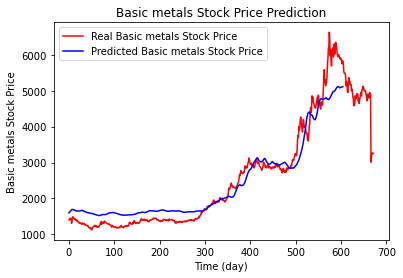

In [20]:
#third code
y_test=[]
real_stock_price = Ind1_test.iloc[:, 1:2].values
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc1.fit_transform(real_stock_price)

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((Ind1_train['close'], Ind1_test['close']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(Ind1_test) - 21:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(21, 626 ):
    X_test.append(inputs[i-21:i, 0])
    y_test.append(inputs[i, 0])

X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = model.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Basic metals Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Basic metals Stock Price')
plt.title('Basic metals Stock Price Prediction')
plt.xlabel('Time (day)')
plt.ylabel('Basic metals Stock Price')
plt.legend()
plt.show()

In [ ]:
Ind2['low'].plot(kind='hist');
plt.ylabel('Number')
plt.xlabel('columns')
plt.title('Non-metallic minerals group')